<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/8%20Artificial%20Neural%20Network/ANNwithOpenCVonMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks - Multi-Layer Perceptrons with OpenCV
# on MNIST Handwritting Digits

OpenCV provides the artificial neural networks (ANN-MLP), which is very similar to that of Keras.

## 1. Mount Google Drive to copy files

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!ls -l

total 8
drwx------ 5 root root 4096 Apr 26 20:26 drive
drwxr-xr-x 1 root root 4096 Apr 21 13:39 sample_data


In [9]:
!ls
!cp drive/MyDrive/'Colab Notebooks'/*.xml .
!ls drive/MyDrive/'Colab Notebooks'

drive  sample_data
 ANNwithOpenCVonMNIST.ipynb	        mnist_ann_784_10.xml
 auxiliary_classifier_GAN.ipynb         mnist_ann_784_128_10.xml
'bidirectional GAN.ipynb'	        mnist_ann_784_256_10.xml
 boundary-seeking_GAN.ipynb	        mnist_ann_784_64_10.xml
 conditional_GAN.ipynb		        OpenCV_Basics.ipynb
 context_encoders.ipynb		        stock_chart.ipynb
 coupled_GAN.ipynb		        stock_intraday.ipynb
'Face Recognition with OpenCV.ipynb'    SVMwithOpenCVonMNIST.ipynb
 generative_adversarial_network.ipynb   Untitled0.ipynb
 K-NearestNeighborsWithOpenCV.ipynb     Untitled1.ipynb


## 2. Main Program
### 2.1 Import Libraries

In [1]:
from keras.datasets import mnist
from keras import utils
import numpy as np
import matplotlib.pyplot as plt
import cv2
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### 2.2 Define functions

In [2]:
def show_random_digits(X, Y, row, col):
    print("The true label is shown in green.")
    _, axarr = plt.subplots(row, col, figsize=(6, 6))
    for i in range(row):
        filter = np.where((Y == i))
        X1, Y1 = X[filter], Y[filter]
        for j in range(col):
            index = np.random.randint(X1.shape[0])
            axarr[i, j].imshow(X1[index], cmap="binary")
            axarr[i, j].axis('off')
            axarr[i, j].text(0.5, 1, str(Y1[index]), fontsize=12, c='g')
    plt.show()

def show_random_result(X, Y, row, col, pred):
    print("The true label is shown in green, and the predicted value is shown within [] in red.")
    _, axarr = plt.subplots(row, col, figsize=(6, 6))
    for i in range(row):
        for j in range(col):
            index = np.random.randint(X.shape[0])
            axarr[i, j].imshow(X[index], cmap="binary")
            axarr[i, j].axis('off')
            axarr[i, j].text(0.5, 1, str(Y[index]), fontsize=12, c='g')
            axarr[i, j].text(10,  1, str(pred[index]), fontsize=12, c='r')
    plt.show()

In [3]:
def create_ANN(layers):
    ann=cv2.ml.ANN_MLP_create()
    ann.setLayerSizes(np.array(layers))
    ann.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
    ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM)
    ann.setTermCriteria((cv2.TermCriteria_EPS|cv2.TermCriteria_COUNT,100,0.0001))
    return ann
    
def save_model(model, filename):
    model.save(filename)

def load_model(filename):
    ann=cv2.ml.ANN_MLP_load(filename)
    return ann

### 2.3 Load MNIST Dataset

11493376/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)
The true label is shown in green.


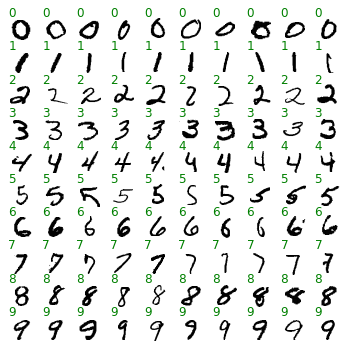

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))
show_random_digits(X_train, y_train, 10, 10)

In [5]:
w, h = X_test[0,:,:].shape
X_train = X_train.reshape(X_train.shape[0], w * h).astype(np.float32)
X_test  = X_test.reshape(  X_test.shape[0], w * h).astype(np.float32)
X_train = X_train / 255
X_test  = X_test / 255
y_train_onehot = utils.to_categorical(y_train)
y_train_onehot = np.float32(y_train_onehot)
y_test  = np.uint(y_test)
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))
print('y_train_onehot:  ' + str(y_train_onehot.shape))

X_train: (60000, 784)
y_train: (60000,)
X_test:  (10000, 784)
y_test:  (10000,)
y_train_onehot:  (60000, 10)


### 2.4 Define an ANN model, and train it with training set

In [ ]:
# Define an ANN model, and train it with training set
ann=create_ANN([784,64,10])
ann.train(X_train, cv2.ml.ROW_SAMPLE, y_train_onehot)

True

### 2.5 (Optional) Save and Load an ANN model

In [ ]:
save_model(ann, 'mnist_ann_784_64_10.xml')

In [10]:
ann = load_model('mnist_ann_784_64_10.xml')

### 2.6 Predict with testing set

In [11]:
result = ann.predict(X_test)
predict = result[1]


### 2.7 Evaluate the results

In [12]:
predict=predict.argmax(axis=1)
print(predict.shape)
print(predict)
print("Accuracy Score:", accuracy_score(y_test, predict))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predict))
print("\nClassification Report:\n", classification_report(y_test, predict))

(10000,)
[7 2 1 ... 4 5 6]
Accuracy Score: 0.9387

Confusion Matrix:
 [[ 965    0    1    2    1    2    6    1    2    0]
 [   1 1119    5    2    0    1    3    0    4    0]
 [  22    1  948   12   10    4   12    9   14    0]
 [  12    2   14  936    0   17    5   10    9    5]
 [   4    1    2    0  940    0   12    6    3   14]
 [  20    4    2   18    7  814    7    3   12    5]
 [  13    4    4    1    4   11  918    1    2    0]
 [   4   14   18    4   10    3    1  961    1   12]
 [  22    4    7   13   12   21    6    8  873    8]
 [  16    6    1    9   34    6    1   16    7  913]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.92      0.93      1032
           3       0.94      0.93      0.93      1010
           4       0.92      0.96      0.94       982
           5       0.93      0.91      0.92      

### 2.8 (Optional) Show Results
Show random results:

The true label is shown in green, and the predicted value is shown within [] in red.


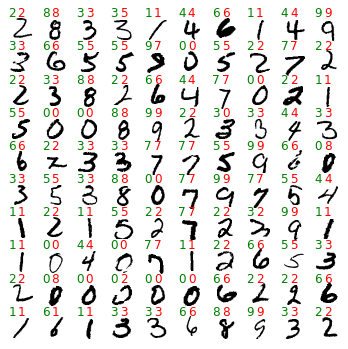

In [13]:
X_test = X_test.reshape(X_test.shape[0], w, h)
show_random_result(X_test , y_test, 10, 10, predict)

Show erroneously predicted digits:

y_test(error): (613,)
results(error): (613,)
X_test(error): (613, 28, 28)
The true label is shown in green, and the predicted value is shown within [] in red.


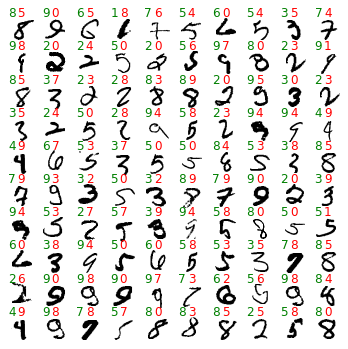

In [14]:
pred_err = np.where(y_test != predict)
print("y_test(error):", y_test[pred_err].shape)
print("results(error):", predict[pred_err].shape)
print("X_test(error):", X_test[pred_err,:,:][0].shape)
show_random_result(X_test[pred_err,:,:][0] , y_test[pred_err], 10, 10, predict[pred_err])

References: 



1.   *https://www.secn.net/article/684929*  *Opencv(python)使用ann神经网络识别手写数字*
2.   *https://medium.com/@prtk13061992/mnist-dataset-using-deep-learning-algorithm-ann-c6f83aa594f5*





